# Model: KNN

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore' )

df=pd.read_csv('H_data.csv',index_col='Time',parse_dates=True)
df.head(5)

,Wind speed,Generator speed,Blade angle,Wind direction,Ambient temperature,Active power
Time,,,,,,
2020-01-01 00:00:00,4.925817,10.938283,-0.769883,-337.491817,28.426233,191.225983
2020-01-01 01:00:00,5.592000,12.452083,-0.769833,-332.980200,28.103967,290.682000
2020-01-01 02:00:00,5.129100,11.393017,-0.769883,-334.400667,28.052650,217.358167
2020-01-01 03:00:00,4.320550,10.504867,-0.769733,-337.342867,27.942000,166.289250
2020-01-01 04:00:00,4.401067,10.000917,-0.769833,-352.839817,27.935250,143.285783


In [2]:
x = df.drop("Active power", axis = 1)
y = df["Active power"] 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(x_train)

# Scale both X_train and X_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [5]:
y_pred = regressor.predict(x_test)

In [6]:
y_pred

array([   0.        ,  350.16731   , 1310.0336002 , ...,  702.4447033 ,
        251.91130334,  641.15508332])

In [7]:
predict_df = pd.DataFrame({"y_Test" : y_test, "y_Predicted" : y_pred})
predict_df.head(20)

,y_Test,y_Predicted
Time,,
2020-04-03 17:00:00,1.540483,0.000000
2020-03-15 20:00:00,364.438983,350.167310
2020-07-07 19:00:00,1326.903667,1310.033600
2020-01-27 16:00:00,309.168033,301.459970
2020-11-05 03:00:00,1161.968167,1207.868000
2020-10-30 04:00:00,0.000000,0.188570
2020-01-10 14:00:00,314.727300,313.066087
2020-08-20 16:00:00,492.090800,528.316523
2020-06-11 15:00:00,1306.816500,1333.364633


In [8]:
#predict_df.to_csv('KNN_dataset.csv', sep=';')

In [9]:
df['Active power'].mean()

524.5310508054788

In [10]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error, mean_squared_error

print('R2-score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))

R2-score: 0.9917361097001856
RMSE: 36.6472886354982
MAE: 17.309723177596016
MSE: 1343.0237643335154


#### Parameter Tuning

In [11]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

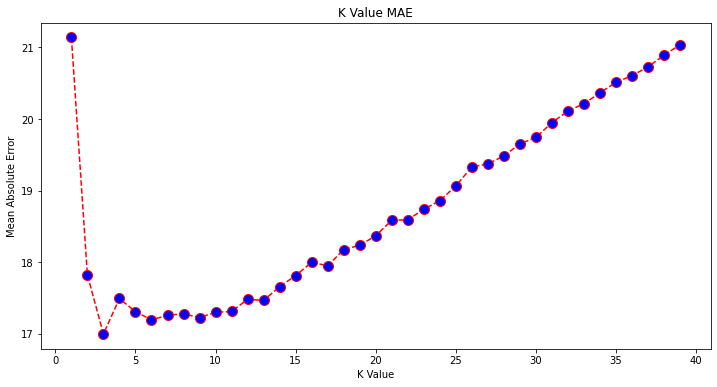

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Looking at the plot, it seems the lowest MAE value is when K is 7.
Let's get a closer look at the plot to be sure by plotting less data:

Text(0, 0.5, 'Mean Absolute Error')

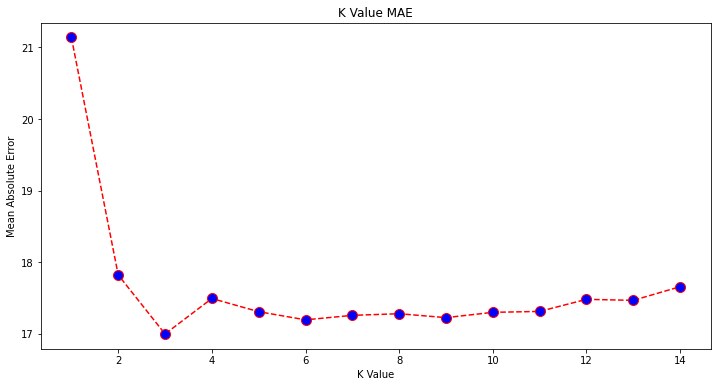

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

We can also obtain the lowest error and the index of that point using the built-in min() function (works on lists) or convert the list into a NumPy array and get the argmin() (index of the element with the lowest value)

In [14]:
import numpy as np 

print(min(error))               
print(np.array(error).argmin()) 

16.998570989855384
2


We started counting neighbors on 1, while arrays are 0-based, so the 6th index is 7 neighbors!

This means that we need 7 neighbors to be able to predict a point with the lowest MAE error. 
We can execute the model and metrics again with 7 neighbors to compare results.

In [15]:
knn_reg12 = KNeighborsRegressor(n_neighbors=7)
knn_reg12.fit(x_train, y_train)
y_pred12 = knn_reg12.predict(x_test)
r2 = knn_reg12.score(x_test, y_test) 


print('R2-score1:',r2_score(y_test,y_pred))
print('RMSE1:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE1:',mean_absolute_error(y_test, y_pred))
print('MSE1:',mean_squared_error(y_test, y_pred))

R2-score1: 0.9917361097001856
RMSE1: 36.6472886354982
MAE1: 17.309723177596016
MSE1: 1343.0237643335154
